In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn

In [5]:
# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)

Text(0.0, 0.1, 'Infinite')

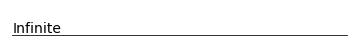

In [103]:
ax = plt.subplot(8, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "Infinite", fontsize=14, transform=ax.transAxes)

In [7]:
# I used to think that the brain had hard limitations, because of the limited permutation of neurological connections.
# However, I realized that although hard memory limits occur given infinite time a human brain could run through infinite
# permutations, because of our ability to abstract and the fact that infinities are nested.

In [8]:
# Think about it this way, if you started at 1 with infinite time there would be no point where you could answer n + 1

In [9]:
# I find the idea of nested infinities, although simple, interesting

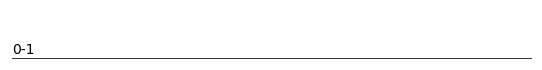

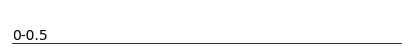

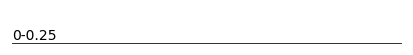

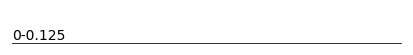

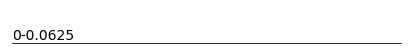

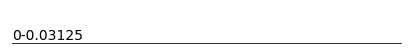

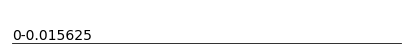

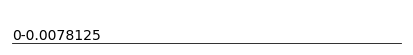

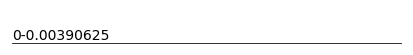

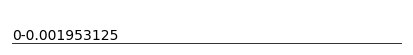

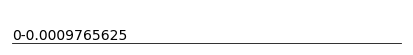

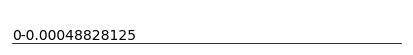

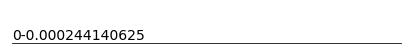

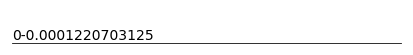

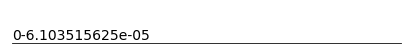

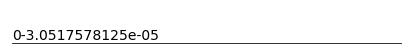

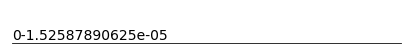

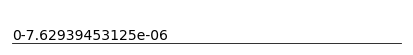

In [ ]:
from IPython.display import clear_output
from time import sleep
start_interval = 0
end_interval = 1
decrement = .5
plt.figure(figsize=(8, 6))

for number in range(50):
    ax = plt.subplot(8, 1, 1)
    setup(ax)
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.xaxis.set_minor_locator(ticker.NullLocator())
    ax.text(0.0, 0.1, f'{start_interval}-{end_interval}', fontsize=14, transform=ax.transAxes)
    end_interval -= decrement
    decrement = decrement/2
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
    plt.show()
    sleep(1)

<Figure size 1440x720 with 0 Axes>

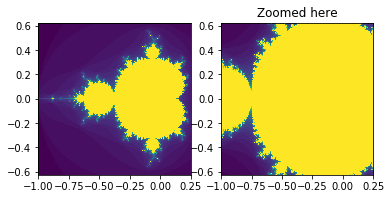

AxesSubplot(0.125,0.125;0.775x0.755)


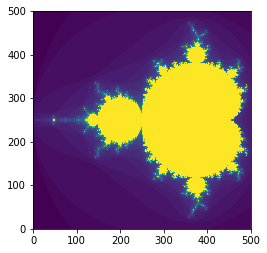

AxesSubplot(0.125,0.125;0.775x0.755)


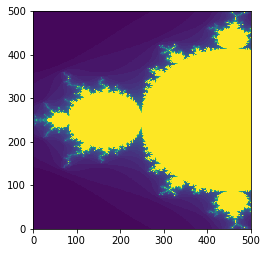

AxesSubplot(0.125,0.125;0.775x0.755)


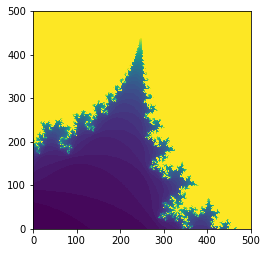

AxesSubplot(0.125,0.125;0.775x0.755)


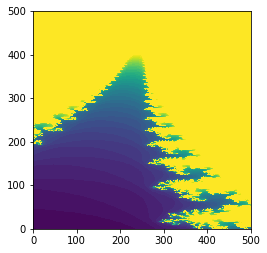

AxesSubplot(0.125,0.125;0.775x0.755)


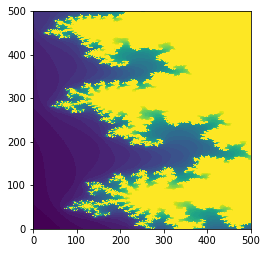

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


# We just subclass Rectangle so that it can be called with an Axes
# instance, causing the rectangle to update its shape to match the
# bounds of the Axes
class UpdatingRect(Rectangle):
    def __call__(self, ax):
        self.set_bounds(*ax.viewLim.bounds)
        ax.figure.canvas.draw_idle()


# A class that will regenerate a fractal set as we zoom in, so that you
# can actually see the increasing detail.  A box in the left panel will show
# the area to which we are zoomed.
class MandelbrotDisplay(object):
    def __init__(self, h=500, w=500, niter=50, radius=2., power=2):
        self.height = h
        self.width = w
        self.niter = niter
        self.radius = radius
        self.power = power

    def __call__(self, xstart, xend, ystart, yend):
        self.x = np.linspace(xstart, xend, self.width)
        self.y = np.linspace(ystart, yend, self.height).reshape(-1, 1)
        c = self.x + 1.0j * self.y
        threshold_time = np.zeros((self.height, self.width))
        z = np.zeros(threshold_time.shape, dtype=complex)
        mask = np.ones(threshold_time.shape, dtype=bool)
        for i in range(self.niter):
            z[mask] = z[mask]**self.power + c[mask]
            mask = (np.abs(z) < self.radius)
            threshold_time += mask
        return threshold_time

    def ax_update(self, ax):
        ax.set_autoscale_on(False)  # Otherwise, infinite loop

        # Get the number of points from the number of pixels in the window
        dims = ax.patch.get_window_extent().bounds
        self.width = int(dims[2] + 0.5)
        self.height = int(dims[2] + 0.5)

        # Get the range for the new area
        xstart, ystart, xdelta, ydelta = ax.viewLim.bounds
        xend = xstart + xdelta
        yend = ystart + ydelta

        # Update the image object with our new data and extent
        im = ax.images[-1]
        im.set_data(self.__call__(xstart, xend, ystart, yend))
        im.set_extent((xstart, xend, ystart, yend))
        ax.figure.canvas.draw_idle()

window = list(map(lambda x: x /2, [-2., 0.5, -1.25, 1.25]))
plt.figure(figsize=(20,10))
md = MandelbrotDisplay()
Z = md(-2., 0.5, -1.25, 1.25)
Z1 = md(*window)

fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Z, origin='lower', extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()))
ax2.imshow(Z1, origin='lower', extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()))

rect = UpdatingRect([0, 0], 0, 0, facecolor='None', edgecolor='black', linewidth=1.0)
rect.set_bounds(*ax2.viewLim.bounds)
ax1.add_patch(rect)

# Connect for changing the view limits
ax2.callbacks.connect('xlim_changed', rect)
ax2.callbacks.connect('ylim_changed', rect)

ax2.callbacks.connect('xlim_changed', md.ax_update)
ax2.callbacks.connect('ylim_changed', md.ax_update)
ax2.set_title("Zoomed here")

plt.show()

zooms = [[-2., 0.5, -1.25, 1.25], 
         [-1.5, 0, -1, 1], 
         [-1, -.5, -.5, 0], 
         [-.8, -.7, -.3, 0], 
         [-.75, -.7, -.3, -.2],
         [-.74, -.73, -.25, -.23]]
for number in range(5):
    fig, ax = plt.subplots(1)
    print(ax)
    md1 = MandelbrotDisplay()
    window = zooms[number]
    Z1 = md1(*window)
    ax.imshow(Z1, origin='lower')
    plt.show()
    

I'm not sure what I want people to feel, I more find this an interesting concept to explore than anything else. I like the idea of viewing the world as permutations and recognizing that infinite permutations can exist within any system. In addition I think it gives insight to the power of abstraction that we can build systems to describe systems that contain an infinity. It makes me wonder about the nature of information.